# Development of effective pricing strategies for pre-owned cars

## Introduction
<p>Given the favorable conditions of huge demand for used cars in the Indian Market, there is potential for Cars4U, as a tech start up, to capture and establish itself in the used cars market.The used car sales exceeding new car sales in 2018-2019 (4 million to 3.6 million) is evidence of a changing market and a huge opportunity.</p>
<p> The pricing models and supply is vastly different for new cars (where new cars are managed by OEMs - Original Equipment Manufacturer) and for used cars. The new cars pricing model is fairly deterministic, while pricing for used cars can be uncertain.</p>
<p> Thus, it becomes imperative to use existing data to develop a pricing model so that strategies for effective pricing can be developed throughout the year.</p>

### Objective
<ol>
    <li>Develop strategies to effectively predict the prices of used cars</li>
    <li>Insights and recommendations for increasing sales of used cars</li>

### Variables/Data Information
<p>S.No. : Serial Number<br>
Name : Name of the car which includes Brand name and Model name<br>
Location : The location in which the car is being sold or is available for purchase Cities<br>
Year : Manufacturing year of the car<br>
Kilometers_Driven : The total kilometers driven in the car by the previous owner(s) in KM.<br>
Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)<br>
Transmission : The type of transmission used by the car. (Automatic / Manual)<br>
Owner_Type : Type of ownership<br>
Mileage : The standard mileage offered by the car company in kmpl or km/kg<br>
Engine : The displacement volume of the engine in CC.<br>
Power : The maximum power of the engine in bhp.<br>
Seats : The number of seats in the car.<br>
New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)<br>
Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)</p>

### The analysis below has the following sections:
<ol>
    <li> Loading and importing packages </li>
    <li> Removing warnings from python notebooks </li>
    <li> Loading the dataset</li>
    <li> Preview of the dataset </li>
    <li> Data preprocessing - shape, datatypes, missing values,transformations </li>
    <li> Descriptive statistics for the dataset </li>
    <li> Univariate, bivariate, and multivariate analysis for the dataset (observations are under each cell)</li>
    <li> Regression model for pricing </li>
    <li> Insights and strategies gained from the model </li>
    <li> Recommendations based on the analysis </li>
    </ol>

### 1. Loading and importing packages

In [1]:
#The packages that will be used for this project include: numpy, pandas, matplotlib, seaborn, sklearn
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # For background of the graphs
%matplotlib inline

#For previewing the data, the columns can be set to limit of None and 100 for the rows. 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

#Below is for regression model metrics and splitting the observations for train/test
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### 2. Removing warnings from python notebook

In [2]:
#Removing warnings from the notebook
import warnings
warnings.filterwarnings('ignore')

### 3. Loading the dataset

In [3]:
#The dataset is stored in a CSV file and we want to read it into a pandas dataframe
usedCarData= pd.read_csv('used_cars_data.csv',index_col=0) 
#We are using index_col = 0, otherwise the dataframe had the first column as an index, and then"S.No." as an index again. 
#Using index_col = 0 will make the dataframe have "S.No." as the first column. 
print(f'The dataframe has {usedCarData.shape[0]} rows and {usedCarData.shape[1]} columns.')
#Using f-string to print the statement for performance reasons

The dataframe has 7253 rows and 13 columns.


### 4. Previewing the dataset

In [4]:
#Preview of the first 5 rows of the dataset
usedCarData.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Observation
<p> The data has 7253 rows and 13 columns. At first glance, "NaN" which is not a number are visible in mulitple columns and rows of the dataset,especially for 'New_Price' column. The "Mileage" column also has two different units - km/kg and kmpl. For purposes of this project, we shall treat km/kg and kmpl to be same (the conversion factor is approximately 1, so we are justified for this assumption. </p>

In [5]:
# Preview of 10 random rows of the dataset
#To see random 10 rows, numpy's random seed was used. 
#Putting random.seed to be 1 will return the same random 10 rows. 
np.random.seed(1)
usedCarData.sample(n=10)
#The Reason we want to return random rows is so that we can see  the typical values from a random sample. 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50


### Observation: 
<p> We can see that the "Name" column has complex strings with multiple words, hyphens and numbers as part of the string.The "Mileage" column has units in it, so a string but we would want it to be numeric so that we can use it as a continous variable. The engine and Power columns also are strings. New_price is again a string, which we would want to convert to a numeric column. Price looks like a numeric column. We choose not to drop any columns at this point as all columns look to have relevant information. </p>

In [6]:
usedCarData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


### Observation
<p> We can see the types of the columns and non-null values in this section. The maximum number of rows are 7253. "Year", "Kilometers_Driven" are int64. "Seats" and "Price" are float, so we can treat these two columns as numeric variables too. "Year", "Kilometers_Driven" have no missing values. "Seats" have considerable number of missing values<br>
    "Name", "Location", "Fuel_type", "Transmission", "Owner_type"being a string is convienient, however for model-building, we will convert some of them to a category. "Name", "Location", "Fuel_type", "Transmission", "Owner_Type" have no missing values. <br>
    However, "Mileage" has 2 missing values. <br>
    "Engine" and "Power" both have 46 missing values.<br>
    By far, the largest number of missing values are in "New_price" (86% of the values are missing). "Price" also has more than a 1000 columns missing.</p>

In [7]:
#Finding the sum total of missing values in each of the columns
usedCarData.isnull().sum().sort_values(ascending=False) 

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

### Observation 
<p> "New_Price" which is a string has the largest number of missing values. This column reflects the price of a new car of the same model. "Engine" and "Power" both have the same number of missing values - 46, which indicates a pattern. However, the remaining columns such as "Seats" and "Mileage" do not adhere to this pattern. "Price" - which will be our dependent varialbe - also has 1234 values missing.</p>

### 5. Data Preprocessing Section

<p> Before we build a regression model to predict the price of used cars, we observe that out of the 13 columns, only 4 are numeric. Also, 6 of the columns have missing values.We will convert some of the columns of type "Object" into numeric columns so that we can have an impute strategy for the missing values. The "Name" column has information about the brand as well as the model - so we can tackle separating out the brand information. </p>
<p> This section has the following pre-processing steps:</p>
<ol> 
    <li>Converting the "Mileage" column to a numeric column</li>
    <li>Converting the "Engine" column to a numeric column</li>
    <li>Convering the "Power" column to a numeric column</li>
    <li>Converting the "New_Price" column to a numeric column</li>
    <li>Imputing values for "Mileage" column for the missing observations.</li>
    <li>Imputing values for "Engine" column for the missing observations.</li>
    <li>Imputing values for "Power" column for the missing observations.</li>
    <li>Imputing values for "New_Price" column for the missing observations.</li>
    <li>Dropping the rows for the dependent variable - the "Price" of the used car.</li>
    <li>Forming "Name_Brand" column from the "Name" column.</li>
    

In [8]:
#Copying the dataframe to another variable name before we do operations on the data
usedCD_preprocessed = usedCarData.copy()

In [9]:
#Before starting preprocessing, a look at the summary statistics 
usedCD_preprocessed.describe(include="all").T #taking transpose since it is easier to view

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations
<p> The mean year is 2013,and the median is 2014, so a symmetric distribution. </p>
<p> The average used car was driven for 58,600 kms (36,473 miles).</p>
<p> The average used car had ~ 5 seats.</p>
<p> The average price of the used car was 9.47 lakhs (~12,000 dollars).</p>
<p> The mean and median for Kilometers_Driven are close - so normal distribution </p>
<p> The mean and median for seats are close - so normal distribution.</p>
<p> The mean and median for price are quite different - so not a normal distribution, plus the max is 160, so outliers may be present. </p>

In [10]:
#Before converting "Mileage" to numeric column, we check for unique values 
usedCD_preprocessed.Mileage.value_counts()

17.0 kmpl     207
18.9 kmpl     201
18.6 kmpl     144
21.1 kmpl     106
20.36 kmpl    105
             ... 
23.01 kmpl      1
21.4 km/kg      1
17.09 kmpl      1
6.4 kmpl        1
17.24 kmpl      1
Name: Mileage, Length: 450, dtype: int64

### Observation
<p>There are 450 unique values for the "Mileage" column. 207 observations were 17 kmpl while there are multiple values that occur just once in the column.</p>


In [11]:
#Converting the "Mileage" column to a numeric column
#We are writing a user-defined function. The description of the function is in the document string. 
def mileage_to_num(mileage_val):
    """This function takes Mileage as the input, determines whether the units
    are present at the end of the string, and then returns them as a float.For any values that don't
    fit the endswith clause will have a "Nan"."""
    if isinstance(mileage_val,str): # to check if the mileage observation is a string
        if mileage_val.endswith("kmpl"):# checks if the value ends with "kmpl"
            return float(mileage_val.replace("kmpl",""))#replacing the units kmpl with ""
        elif mileage_val.endswith("km/kg"):#some values seen in the preview ended with "km/kg"
            return float(mileage_val.replace("km/kg",""))
        else:
            return np.nan
usedCD_preprocessed["Mileage_in_kmpl"] = usedCD_preprocessed["Mileage"].apply(mileage_to_num)

In [12]:
#Preview the processed "Mileage" column
usedCD_preprocessed.Mileage_in_kmpl.head()

S.No.
0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage_in_kmpl, dtype: float64

### Observations
<p> The "Mileage" column is successfully stripped of its units (which we still describe in the title of the column) and is now of type float. </p> 

In [13]:
#We can now drop the "Mileage" column as "Mileage_in_kmpl" will take its place. 
usedCD_preprocessed.drop("Mileage",axis=1,inplace=True)

<p> We shall repeat the above actions for "Engine", "Power" and "New_Price"</p>

In [14]:
#Converting the "Engine" column to a numeric column
#We are writing a user-defined function. The description of the function is in the document string. 
def engine_to_num(engine_val):
    """This function takes "Engine" as the input, determines whether the units
    are present at the end of the string, and then returns them as a float.For any values that don't
    fit the endswith clause will have a "Nan"."""
    if isinstance(engine_val,str):
        if engine_val.endswith("CC"):
            splt = engine_val.split(" ")
            return float(splt[0])
        else:
            return np.nan
usedCD_preprocessed["Engine_in_CC"] = usedCD_preprocessed["Engine"].apply(engine_to_num)

In [15]:
#Preview the processed "Engine" column
usedCD_preprocessed.Engine_in_CC.head()

S.No.
0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: Engine_in_CC, dtype: float64

### Observations
<p> The "Engine" column is successfully stripped of its units (which we still describe in the title of the column) and is now of type float. </p> 

In [16]:
#We can now drop the "Engine" column as "Engine_in_kmpl" will take its place. 
usedCD_preprocessed.drop("Engine",axis=1,inplace=True)

In [17]:
#For the power column, there are null values as seen when looking at unique values
usedCD_preprocessed.Power.value_counts()

74 bhp        280
98.6 bhp      166
73.9 bhp      152
140 bhp       142
null bhp      129
             ... 
270.88 bhp      1
71.01 bhp       1
261.5 bhp       1
152.88 bhp      1
360 bhp         1
Name: Power, Length: 386, dtype: int64

In [18]:
#Converting the null values to NaN 
usedCD_preprocessed['Power'] = usedCD_preprocessed['Power'].replace("null bhp", "NaN")
#This will get the column ready for converting to a numeric column
usedCD_preprocessed.Power.value_counts()#NaNs will be present

74 bhp        280
98.6 bhp      166
73.9 bhp      152
140 bhp       142
NaN           129
             ... 
270.88 bhp      1
71.01 bhp       1
261.5 bhp       1
152.88 bhp      1
360 bhp         1
Name: Power, Length: 386, dtype: int64

In [19]:
#Converting the "Power" column to a numeric column
#We are writing a user-defined function. The description of the function is in the document string. 
def power_to_num(power_val):
    """This function takes "Power" as the input, determines whether the units
    are present at the end of the string, and then returns them as a float.For any values that don't
    fit the endswith clause will have a "Nan"."""
    if isinstance(power_val,str):
        if power_val.endswith("bhp"):# the units are brake horsepower
            splt = power_val.split(" ")                         
            return float(splt[0])
    else:
        return np.nan
usedCD_preprocessed["Power_in_bhp"] = usedCD_preprocessed["Power"].apply(power_to_num)

In [20]:
#Preview the processed "Engine" column
usedCD_preprocessed.Power_in_bhp.head()

S.No.
0     58.16
1    126.20
2     88.70
3     88.76
4    140.80
Name: Power_in_bhp, dtype: float64

In [21]:
#We can now drop the "Power" column as "Power_in_bhp" will take its place. 
usedCD_preprocessed.drop("Power",axis=1,inplace=True)

In [22]:
#Converting the "New_Price" column to a numeric column
def newprice_to_num(newprice_val):
    """This function takes "New_Price" as the input, determines whether the units
    are present at the end of the string, and then returns them as a float.For any values that don't
    fit the endswith clause will have a "Nan"."""
    if isinstance(newprice_val,str):
        if newprice_val.endswith("Lakh"):
            splt = newprice_val.split(" ")#the string will be split at the space between number and Lakhs
            return float(splt[0])
        else:
            return np.nan
usedCD_preprocessed['New_Price_num'] = usedCD_preprocessed['New_Price'].apply(newprice_to_num)

In [23]:
#Preview the processed "New_Price" column
usedCD_preprocessed.New_Price_num.head()

S.No.
0     NaN
1     NaN
2    8.61
3     NaN
4     NaN
Name: New_Price_num, dtype: float64

In [24]:
#We can now drop the "New_Price" column as "New_Price_num" will take its place. 
usedCD_preprocessed.drop("New_Price",axis=1,inplace=True)

#### The next steps are to deal with the missing values for the columns
<p> One of the first steps for this is to split the "Name" - which contains both brand and model name into different sets. This will give us a pathway to use medians/means for imputing values that will give consideration to which company or brand name the data is related to.</p>

In [25]:
#Splitting the "Name" to have brand name and model name separate
def name_split(name_val):
    """This function takes "Name" as the input, splits the words at the space between them, and 
    returns the brand name. If there are any that don't fit the condition of string, 
    then NaN will be returned."""
    if isinstance(name_val,str):
        splt = name_val.split(" ")
        return str(splt[0])
    else:
        return np.nan
usedCD_preprocessed['Name_Brand'] = usedCD_preprocessed['Name'].apply(name_split)

In [26]:
#We will not drop the "Name" column at present as we may need it later for the regression model.
#Looking at the types for the dataset now
usedCD_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Seats              7200 non-null   float64
 8   Price              6019 non-null   float64
 9   Mileage_in_kmpl    7251 non-null   float64
 10  Engine_in_CC       7207 non-null   float64
 11  Power_in_bhp       7078 non-null   float64
 12  New_Price_num      986 non-null    float64
 13  Name_Brand         7253 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 850.0+ KB


### Observations
<p> We now have 6 columns that are float, 2 columns are int, and 6 objects. </p>

In [27]:
#A look at the missing values again
usedCD_preprocessed.isnull().sum().sort_values(ascending=False)

New_Price_num        6267
Price                1234
Power_in_bhp          175
Seats                  53
Engine_in_CC           46
Mileage_in_kmpl         2
Name_Brand              0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [28]:
#Copying the dataframe again before we impute the values
usedCD_preprocessed1 = usedCD_preprocessed.copy()

#Imputation for seats - we will take median of seats by brand, and subsitute it for the missing values

usedCD_preprocessed1[["Seats"]] = usedCD_preprocessed1.groupby(["Name_Brand"])[
    "Seats"
].transform(lambda x: x.fillna(x.median()))
#For above, we can take either the mean or the median. In the case of "Seats", mean is approx.
#same as the median, so both strategies will work. In this case, we will take the mean value. 
#Using lambda function above
usedCD_preprocessed1.isnull().sum().sort_values(ascending=False)#checking to see if missing values disappeared

New_Price_num        6267
Price                1234
Power_in_bhp          175
Engine_in_CC           46
Mileage_in_kmpl         2
Name_Brand              0
Seats                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

#### Observations
<p> The "Seats" column has no missing values.</p>

In [29]:
#Imputation for Power - we will take median of Power by brand, and subsitute it for the missing values

usedCD_preprocessed1[["Power_in_bhp"]] = usedCD_preprocessed1.groupby(["Name_Brand"])[
    "Power_in_bhp"
].transform(lambda x: x.fillna(x.median()))
usedCD_preprocessed1.isnull().sum().sort_values(ascending=False)#checking to see if missing values disappeared

New_Price_num        6267
Price                1234
Engine_in_CC           46
Power_in_bhp            2
Mileage_in_kmpl         2
Name_Brand              0
Seats                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [30]:
#The Power_in_bhp still has 2 missing values. 
usedCD_preprocessed1.groupby("Name_Brand")["Power_in_bhp"].mean()

Name_Brand
Ambassador        35.500000
Audi             189.287579
BMW              210.263750
Bentley          584.000000
Chevrolet         90.833113
Datsun            60.644706
Fiat              89.276316
Force            139.030000
Ford              96.215783
Hindustan               NaN
Honda            108.357900
Hyundai           91.727866
ISUZU            134.000000
Isuzu            167.785000
Jaguar           236.216458
Jeep             168.947368
Lamborghini      560.000000
Land             188.699104
Mahindra         119.475227
Maruti            74.000007
Mercedes-Benz    193.580711
Mini             146.656774
Mitsubishi       145.193333
Nissan            89.534872
OpelCorsa         88.000000
Porsche          323.189474
Renault           87.510471
Skoda            126.443267
Smart                   NaN
Tata              78.206535
Toyota           128.402367
Volkswagen        94.783783
Volvo            188.464286
Name: Power_in_bhp, dtype: float64

### Observations
<p>We can see the "Hindustan" brand has a NaN, hence the value was not replaced by the median of the brand (as all values for that particular brand are NaN). In such a scenario, we can compute the median of the entire column, since brand information is not available, and replace the NaN by the column mean.</p>

In [31]:
#Imputing values for remaining Power_in_bhp
usedCD_preprocessed1['Power_in_bhp'].fillna(usedCD_preprocessed1['Power_in_bhp'].median(),inplace=True)

In [32]:
#Checking to see missing values 
usedCD_preprocessed1.isnull().sum().sort_values(ascending=False)

New_Price_num        6267
Price                1234
Engine_in_CC           46
Mileage_in_kmpl         2
Name_Brand              0
Power_in_bhp            0
Seats                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [33]:
usedCD_preprocessed1[["Engine_in_CC"]] = usedCD_preprocessed1.groupby(["Name_Brand"])[
    "Engine_in_CC"
].transform(lambda x: x.fillna(x.median()))
#For above, we can take either the mean or the median. We are using the brand information to compute the median
# as it is likely to be more representative of the brand than median of entire column.
usedCD_preprocessed1.isnull().sum().sort_values(ascending=False)#checking to see if missing values disappeared

New_Price_num        6267
Price                1234
Mileage_in_kmpl         2
Name_Brand              0
Power_in_bhp            0
Engine_in_CC            0
Seats                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

#### Observations
<p> The "Engine_in_CC" column has no missing values.</p>

In [34]:
#Same approach for New_Price_num:
usedCD_preprocessed1[["New_Price_num"]] = usedCD_preprocessed1.groupby(["Name_Brand"])[
    "New_Price_num"
].transform(lambda x: x.fillna(x.median()))
usedCD_preprocessed1.isnull().sum().sort_values(ascending=False)#checking to see missing values

Price                1234
New_Price_num         183
Mileage_in_kmpl         2
Name_Brand              0
Power_in_bhp            0
Engine_in_CC            0
Seats                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

#### Observations:
<p>As we can see there are 183 values still missing for New_Price_num. This is because there are no values for some brands, thus no median to substitute for. In such a scenario, one strategy is to replace it with the column mean.</p>

In [35]:
usedCD_preprocessed1['New_Price_num'].fillna(usedCD_preprocessed1['New_Price_num'].median(),inplace=True)

In [36]:
#checking to see missing values
usedCD_preprocessed1.isnull().sum().sort_values(ascending=False)

Price                1234
Mileage_in_kmpl         2
Name_Brand              0
New_Price_num           0
Power_in_bhp            0
Engine_in_CC            0
Seats                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [37]:
#For "Mileage_in_kmpl", there are 2 values, which we will impute with the median
usedCD_preprocessed1['Mileage_in_kmpl'].fillna(usedCD_preprocessed1['Mileage_in_kmpl'].median(),inplace=True)

In [38]:
#checking to see missing values
usedCD_preprocessed1.isnull().sum().sort_values(ascending=False)

Price                1234
Name_Brand              0
New_Price_num           0
Power_in_bhp            0
Engine_in_CC            0
Mileage_in_kmpl         0
Seats                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

#### Observations
<p> We are left with the dependent variable, "Price" which has 1234 missing values.
    Since this is a dependent variable, we will drop the observations (rows) with the missing values."</p>

In [39]:
#dropping rows for dependent variable
usedCD_preprocessed1.dropna(subset=['Price'],inplace=True)

In [40]:
#checking to see missing values
usedCD_preprocessed1.isnull().sum().sort_values(ascending=False)

Name_Brand           0
New_Price_num        0
Power_in_bhp         0
Engine_in_CC         0
Mileage_in_kmpl      0
Price                0
Seats                0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
Location             0
Name                 0
dtype: int64

#### Observations
<p> Our dataset has no missing values, and can now be used for further analysis.</p>

In [41]:
#summary statistics
usedCD_preprocessed1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.000,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.000,73000.00,6500000.00
Seats,6019.0,5.277122,0.806644,0.00,5.00,5.000,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.640,9.95,160.00
Mileage_in_kmpl,6019.0,18.134969,4.581528,0.00,15.17,18.160,21.10,33.54
Engine_in_CC,6019.0,1620.431135,600.404083,72.00,1197.00,1493.000,1984.00,5998.00
Power_in_bhp,6019.0,112.918615,53.624857,34.20,75.00,93.700,138.10,560.00
New_Price_num,6019.0,19.561510,19.401280,3.91,8.16,11.105,23.25,99.92


#### Observations
<p> We can now see that engine and Power are skewed distributions, though the skewness is not extreme,
as the mean and median values are different, but still close. </p>

### 7. Univariate, bivariate and multivariate analysis

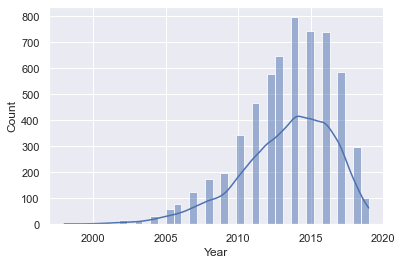

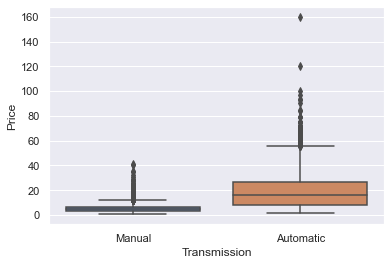

In [42]:
# Univariate analysis section
sns.histplot(data=usedCD_preprocessed1, x='Year', kde=True);
plt.show()#To display 2 graphs as the output of this cell

#Summary Statistics on 'Price' variable with respect to 'Transmission'
sns.boxplot(usedCD_preprocessed1['Transmission'],usedCD_preprocessed1['Price']);
plt.show()

### Observations: 
<ol>
    <li>The mean and median are different for the frequency distribution of data for Year of the customer. The distribution is slightly skewed to the left (negative skew). The tail is to the left, so less number of used cars were sold during the early 2000s, while the sales picked up later.</li>
    <li>Among the two transmission types, the mean and medians were different for manual versus automatic. There were also outliers as visible in the box plot. </li>


In [43]:
#Using heatmap to look at correlation between the different columns
corr_cols = [item for item in usedCD_preprocessed1.columns]
print(corr_cols)

['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Price', 'Mileage_in_kmpl', 'Engine_in_CC', 'Power_in_bhp', 'New_Price_num', 'Name_Brand']


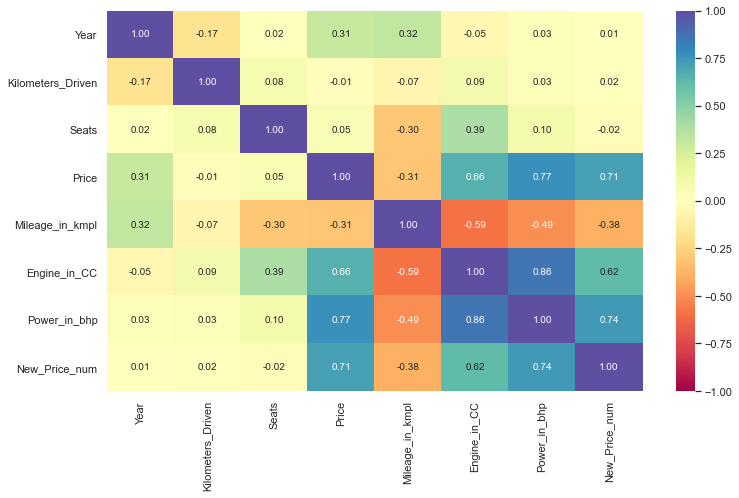

In [44]:
plt.figure(figsize=(12,7))
sns.heatmap(usedCD_preprocessed1[corr_cols].corr(),annot=True,vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations
<p> A positive correlation is seen between "Engine_in_CC" and "Price". Similarly, positive correlation is seen for "Power_in_bhp" and "Price" and "New_Price_num" and "Price". There is also a positive correlation between the engine variable and power.</p> 

In [45]:
#gathering numeric columns
new_cols = [
    item for item in usedCD_preprocessed1.select_dtypes(include=np.number).columns ]

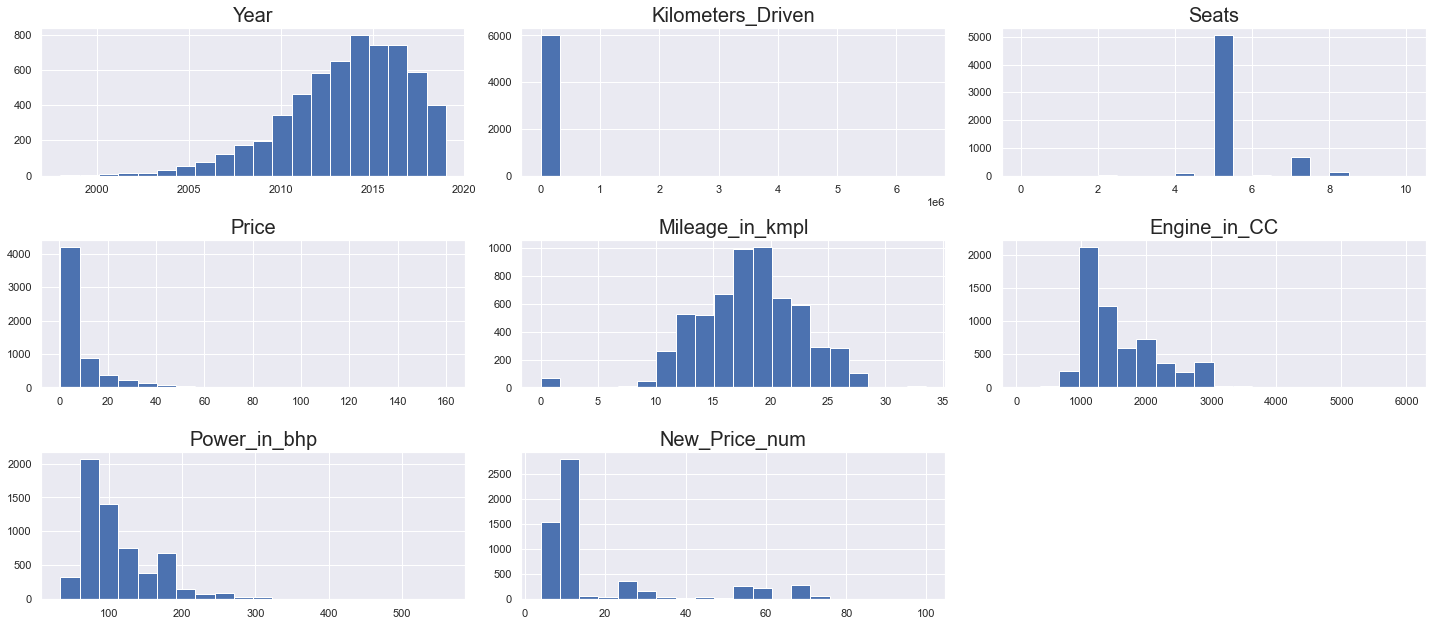

In [46]:
plt.figure(figsize=(20, 35))

for i in range(len(new_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(usedCD_preprocessed1[new_cols[i]], bins=20)
    plt.tight_layout()
    plt.title(new_cols[i], fontsize=20)

plt.show()

#### Observations
<p> Mileage is a normal distribution. Year is left skewed, while price is right skewed with a large range. Engine, Power and new price are also right skewed.</p>
<p> For better visualization, a log transformation will be appropriate for Price, engine and power and new price.</p>

### 8. Regression Model for pricing
<p> Our dependent variable is "Price". </p>

In [47]:
#We will convert the object columns except Name into category variables to facilitate one hot encoding
categorical_var = ['Location', 'Fuel_Type', 'Transmission',
            'Owner_Type']


for colname in categorical_var:
    usedCD_preprocessed1[colname] = usedCD_preprocessed1[colname].astype('category')
    
usedCD_preprocessed1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   category
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Seats              6019 non-null   float64 
 8   Price              6019 non-null   float64 
 9   Mileage_in_kmpl    6019 non-null   float64 
 10  Engine_in_CC       6019 non-null   float64 
 11  Power_in_bhp       6019 non-null   float64 
 12  New_Price_num      6019 non-null   float64 
 13  Name_Brand         6019 non-null   object  
dtypes: category(4), float64(6), int64(2), object(2)
memory usage: 701.6+ KB


In [48]:
independent_var = usedCD_preprocessed1.drop(["Price","Name","Location"], axis=1)# Price goes in dependent variable column
dependent_var = usedCD_preprocessed1[["Price"]]

<p> The Name and Location columns were dropped after trial and error (not shown in the notebook to keep it short and perusable. </p>

In [49]:
#Encoding the categorical variable using dummy variables
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


independent_var_num = encode_cat_vars(independent_var)
independent_var_num.head()

,Year,Kilometers_Driven,Seats,Mileage_in_kmpl,Engine_in_CC,Power_in_bhp,New_Price_num,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Name_Brand_Audi,Name_Brand_BMW,Name_Brand_Bentley,Name_Brand_Chevrolet,Name_Brand_Datsun,Name_Brand_Fiat,Name_Brand_Force,Name_Brand_Ford,Name_Brand_Honda,Name_Brand_Hyundai,Name_Brand_ISUZU,Name_Brand_Isuzu,Name_Brand_Jaguar,Name_Brand_Jeep,Name_Brand_Lamborghini,Name_Brand_Land,Name_Brand_Mahindra,Name_Brand_Maruti,Name_Brand_Mercedes-Benz,Name_Brand_Mini,Name_Brand_Mitsubishi,Name_Brand_Nissan,Name_Brand_Porsche,Name_Brand_Renault,Name_Brand_Skoda,Name_Brand_Smart,Name_Brand_Tata,Name_Brand_Toyota,Name_Brand_Volkswagen,Name_Brand_Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010,72000,5.0,26.60,998.0,58.16,7.87,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,19.67,1582.0,126.20,9.74,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,18.20,1199.0,88.70,8.61,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,20.77,1248.0,88.76,7.87,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,15.20,1968.0,140.80,53.14,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
independent_var_num.shape

(6019, 45)

<p> There are 6019 rows and 1935 columns because all the categorical columns and their different types got encoded into a column.</p>

In [51]:
# Splitting the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(
    independent_var_num, dependent_var, test_size=0.3, random_state=1
)

In [52]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


In [53]:
from sklearn.linear_model import LinearRegression
#Building the regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [54]:
#Get the coefficients and intercept
coef_num = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
#print(coef_df,'.8f')
coef_num

,Coefficients
Year,9.406607e-01
Kilometers_Driven,-1.671306e-05
Seats,8.744788e-02
Mileage_in_kmpl,-1.092441e-01
Engine_in_CC,1.714071e-03
Power_in_bhp,7.806797e-02
New_Price_num,3.580863e-01
Fuel_Type_Diesel,7.085144e-01
Fuel_Type_Electric,8.893304e+00
Fuel_Type_LPG,2.334704e+00


In [55]:
#This function is used to calculate the RMSE, MAS, R2 and the adjusted R2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = independent_var.shape[0]
    k = independent_var.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [56]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  5.508449  3.019505  0.762699      0.762265


Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  5.687338  2.887529  0.727624      0.727125


#### Observations
<ol>
    <li> Some of the coefficients are positive, but some are also negative.</li>
    <li> Engine, Power, New Price, Year are all positively correlated (as was seen in the heatmap too. </li>
    <li> The train and test R2 are 0.76 and 0.73 (approximately).</li>
    <li> The above R2 values show that the regression model explains 76% of the data for the 
        training set, and 72% for the testing set.</li>
    <li> RMSE values are comparable, as are the MAE, and R2 and Adjusted R2 </li>
    <li> Thus, dropping the Name and Location columns resulted in a model that was reasonble
        in terms of regression metrics.</li>
    <li> The model can definitely still be improved - better imputation, feature engineering - may result in a model with a better train and test R2. </li>

### Insights and Recommendations
<p> The company should not focus on where it is selling the used cars, or factor in location in its pricing schedule as it would not give a huge benefit. The above model can be used for prediction of used car prices to a reasonable extent based on whether customers want a sedan, or van, or a particular engine type. The price is correlated with engine, power and price of a new car of the same model, so these factors should be given weightage when deciding the price of a used car.</p>